## Исследование данных о российском кинопрокате



# Описание проекта
Изучить рынок российского кинопроката и выявить текущие тренды.  Данные, опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

 # Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

title — название фильма;

puNumber — номер прокатного удостоверения;

show_start_date — дата премьеры фильма;

type — тип фильма;

film_studio — студия-производитель;

production_country — страна-производитель;

director — режиссёр;

producer — продюсер;

age_restriction — возрастная категория;

refundable_support — объём возвратных средств государственной поддержки;

nonrefundable_support — объём невозвратных средств государственной поддержки;

financing_source — источник государственного финансирования;

budget — общий бюджет фильма;

ratings — рейтинг фильма на КиноПоиске;

genres — жанр фильма.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
#импорт библиотеки и чтение файлов 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_m =pd.read_csv('/datasets/mkrf_movies.csv')
data_sh=pd.read_csv('/datasets/mkrf_shows.csv')
pd.options.display.float_format = '{:.2f}'.format
display(data_m.head(10))


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [2]:
display(data_m.head(10))
display( data_sh.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79
5,111000119,4293649.51
6,111000212,200.00
7,111000216,355567.00
8,111000313,710.00
9,111000314,1607970.00


In [3]:
# общая информация по таблице
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# общая информация по таблице
data_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
# замена  типа данных в столбце puNumber на объект 
data_sh['puNumber']=data_sh['puNumber'].astype('str')
display(data_sh['puNumber'])



0       111000113
1       111000115
2       111000116
3       111000117
4       111000118
          ...    
3153    224014814
3154    224021411
3155    224022410
3156    224023210
3157    224026410
Name: puNumber, Length: 3158, dtype: object

In [6]:
# объединение двух таблиц по одинаковому столбцу 
df=data_m.merge( data_sh,on='puNumber', how='left')
display(df. head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


<div class="alert alert-info">по столбцу box_office и в исходном и в конечном датафрейме 
одинаковое кол-во строк 3158 non-null float64

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:
# общая информация  о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
# подсчет пропусков
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [9]:
#общая оценка  значений столбца
df['ratings'].value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
19%      1
1.0      1
89%      1
8.9      1
1.2      1
Name: ratings, Length: 94, dtype: int64

 <div class="alert alert-info"> В столбце встречаются странные значения с % Преобразуем данные в числовой тип и некорректные значения заменятся на NAN

In [10]:
# преобразуем в числовой тип
df['ratings']=pd.to_numeric(df['ratings'],errors ='coerce')

df['ratings'].value_counts()

6.60    312
6.70    308
6.80    261
7.20    252
6.20    243
       ... 
8.90      1
9.20      1
1.90      1
9.10      1
1.30      1
Name: ratings, Length: 80, dtype: int64

In [11]:
df['ratings'].isna().sum()

996

 <div class="alert alert-info">Строки с процентами( 29 строк) добавились в общие пропуски.
        Можно заменить их на ноль, нет на Кинопоиск ))

In [12]:
#Заполнение пропусков в колонке ratings на 0
df['ratings']=df['ratings'].fillna(value=0)
display(df['ratings'].value_counts())

0.00    996
6.60    312
6.70    308
6.80    261
7.20    252
       ... 
9.20      1
1.20      1
1.90      1
9.10      1
1.30      1
Name: ratings, Length: 81, dtype: int64

In [13]:
df[['ratings']].describe()

,ratings
count,7486.00
mean,5.62
std,2.43
min,0.00
25%,5.30
50%,6.40
75%,7.10
max,9.20


 <div class="alert alert-info"> Пропуски в колонках касающихся гос финансирования ,а именно  столбцы:
    
    
    refundable_support — объём возвратных средств государственной поддержки;

    nonrefundable_support — объём невозвратных средств государственной поддержки;

    financing_source — источник государственного финансирования;
    
    
наличие в них одинакового кол-ва пропусков позволяет нам предполагать ,что финансирование данных проектов осуществлялось из негосударственных(коммерческих либо других ) источников. Поэтому , считаю логичным этот вид пропусков не устранять.Это касается и колонки бюджет для данных фильмов (значения одинаковы)),т.к. в документации к проекту сказано, что данные в этом столбце указаны только для фильмов с господдержкой

In [15]:
#общая оценка  значений столбца genres
df['genres'].value_counts()

драма                       476
комедия                     352
мелодрама,комедия           222
драма,мелодрама,комедия     189
драма,мелодрама             183
                           ... 
мелодрама,драма,фэнтези       1
триллер,ужасы,детектив        1
драма,фантастика,ужасы        1
комедия,семейный,музыка       1
мюзикл,мелодрама,фэнтези      1
Name: genres, Length: 742, dtype: int64

In [16]:
#Заполнение пропусков в колонке genres 
df['genres']=df['genres'].fillna(value='None')
display(df['genres'].value_counts())

None                              976
драма                             476
комедия                           352
мелодрама,комедия                 222
драма,мелодрама,комедия           189
                                 ... 
мультфильм,приключения,военный      1
детектив,боевик,история             1
мюзикл,фэнтези,семейный             1
спорт,драма,комедия                 1
приключения,детектив,семейный       1
Name: genres, Length: 743, dtype: int64

In [17]:
#общая оценка  значений столбца 
df['director'].value_counts()

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Карстен Килерих      1
А.Лукин              1
Срджан Драгоевич     1
Б.Худойназаров       1
Я.Варлашкина         1
Name: director, Length: 4811, dtype: int64

In [18]:
#Заполнение пропусков в колонке director
df['director']=df['director'].fillna(value='None')
display(df['director'].value_counts())


О.Семёнова          47
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Карстен Килерих      1
А.Лукин              1
Срджан Драгоевич     1
Б.Худойназаров       1
Я.Варлашкина         1
Name: director, Length: 4812, dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [19]:
#подсчет явных дубликатов
display(df.duplicated().sum())

0

 <div class="alert alert-info"> Явных  дубликатов не видно...

In [20]:
# Просмотр уникальных названий в столбце  title
display(df['title'].sort_values().unique())

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

 <div class="alert alert-info"> Видна разница в написании названий ( в регистрах)

In [21]:
# замена букв в значениях title на строчные
df['title']=df['title'].str.lower()
display(df['title'])


0                                   открытый простор
1                               особо важное задание
2                                       особо опасен
3                                       особо опасен
4                                       особо опасен
                            ...                     
7481       сад художника: американский импрессионизм
7482                                 звериная ярость
7483       щенячий патруль: скорей спешим на помощь!
7484        машины песенки. серия "испанские мотивы"
7485    машины песенки. серия "когда цветут кактусы"
Name: title, Length: 7486, dtype: object

In [22]:
display(df['title'].duplicated().sum())

724

 <div class="alert alert-info">  Вот они и обнаружились

In [23]:
display(df['title'].sort_values().unique())

array([' я препод', '"sos" над тайгой', '"v" значит вендетта', ...,
       'ёлки 5', 'ёлки новые', 'ёлки последние'], dtype=object)

In [24]:
# проверка регистра и уникальных значений 
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
display(df['title'].sort_values().unique())
df = df.drop_duplicates(subset = ['title'])
display(df['title'].duplicated().sum())

array([' я препод', '"sos" над тайгой', '"v" значит вендетта', ...,
       'ёлки 5', 'ёлки новые', 'ёлки последние'], dtype=object)

0

In [25]:
# проверка регистра и уникальных значений 
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
display(df['puNumber'].sort_values().unique())
df = df.drop_duplicates(subset = ['puNumber'])
display(df['puNumber'].duplicated().sum())

array([' 111004112', '111000110', '111000111', ..., '226019110',
       '231001012', 'нет'], dtype=object)

0

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [27]:
# общая информация  о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6762 non-null   object 
 1   puNumber               6762 non-null   object 
 2   show_start_date        6762 non-null   object 
 3   type                   6762 non-null   object 
 4   film_studio            6745 non-null   object 
 5   production_country     6760 non-null   object 
 6   director               6762 non-null   object 
 7   producer               6203 non-null   object 
 8   age_restriction        6762 non-null   object 
 9   refundable_support     329 non-null    float64
 10  nonrefundable_support  329 non-null    float64
 11  budget                 329 non-null    float64
 12  financing_source       329 non-null    object 
 13  ratings                6762 non-null   float64
 14  genres                 6762 non-null   object 
 15  box_

In [28]:
display(df['type'].sort_values())

6564       Анимационный
5856     Художественный
6477     Художественный
5621     Художественный
5620     Художественный
             ...       
2648     Художественный
2644     Художественный
2643     Художественный
2659     Художественный
3667     Художественный
Name: type, Length: 6762, dtype: object

In [29]:
display(df['type'].unique())

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

 <div class="alert alert-info"> Удаляю пробелы в названии

In [30]:
for col in ['type']:
    df[col] = df[col].replace("\s+", " ", regex=True).str.strip()

display(df['type'].sort_values().unique())


array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [31]:
display(df['producer'].sort_values())

2858                                            А.Шальопа
1803                                            Г.Шпригов
250      Дитмар Ганше, Филипп Фогес,  Бенджамин Херрма...
4906                                          И.Гелашвили
3222                        К.Шахназаров, А.Златопольский
                              ...                        
7405                                                  NaN
7406                                                  NaN
7407                                                  NaN
7408                                                  NaN
7409                                                  NaN
Name: producer, Length: 6762, dtype: object

In [32]:
display(df['producer'].unique())

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [33]:
display(df['production_country'].sort_values().unique())

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [34]:
display(df['production_country'].sort_values())

2423                     СССР
2426                     СССР
1975                    СССР 
2060                  СССР   
7247                     2019
                ...          
5046    Япония-Великобритания
835     Япония-Великобритания
4628       Япония-США-Франция
3186                      NaN
4441                      NaN
Name: production_country, Length: 6762, dtype: object

In [35]:
display(df['film_studio'].sort_values())

7291                                      АНО "Кинофорум"
2768      Ауматик Интертейнмент, Блюмхаус Продакшнз и др.
5836     ЗАО "Кинокомпания ФаворитФильм" по заказу ООО...
4050     Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...
6258                                        ООО "АВАТАРА"
                              ...                        
6511                                                  NaN
6638                                                  NaN
6639                                                  NaN
6662                                                  NaN
6722                                                  NaN
Name: film_studio, Length: 6762, dtype: object

In [36]:
display(df['film_studio'].unique())

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [37]:
display(df['age_restriction'].unique())

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [38]:
display(df['age_restriction'].sort_values())

7485    «0+» - для любой зрительской аудитории
1717    «0+» - для любой зрительской аудитории
1716    «0+» - для любой зрительской аудитории
5790    «0+» - для любой зрительской аудитории
1709    «0+» - для любой зрительской аудитории
                         ...                  
1399             «6+» - для детей старше 6 лет
1354             «6+» - для детей старше 6 лет
6124             «6+» - для детей старше 6 лет
1472             «6+» - для детей старше 6 лет
5791             «6+» - для детей старше 6 лет
Name: age_restriction, Length: 6762, dtype: object

In [39]:
display(df['financing_source'].sort_values())

1281    Министерство культуры
3203    Министерство культуры
3208    Министерство культуры
6771    Министерство культуры
3228    Министерство культуры
                ...          
7481                      NaN
7482                      NaN
7483                      NaN
7484                      NaN
7485                      NaN
Name: financing_source, Length: 6762, dtype: object

<div class="alert alert-info"> во многих категориальных столбцах , а именно (financing_source,film_studio,producer,director)
 данные перечислены через запятую, что неудобно для  создания  категорий и анализа.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

0          NaN
1          NaN
2          NaN
5          NaN
6      2700.00
         ...  
7481       NaN
7482       NaN
7483       NaN
7484       NaN
7485       NaN
Name: box_office, Length: 6762, dtype: float64

,box_office
count,3012.00
mean,75705271.75
std,237883862.66
min,0.00
25%,115761.00
50%,2416796.50
75%,23721060.50
max,3073568690.79


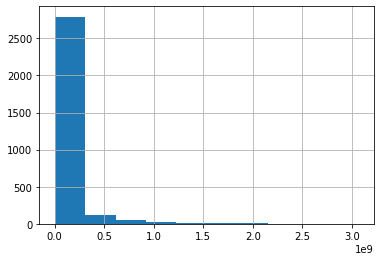

In [40]:
 # изучение box_office
df['box_office'].value_counts()
display(df['box_office'])
df['box_office'].hist()
df[['box_office']].describe() 

<AxesSubplot:>

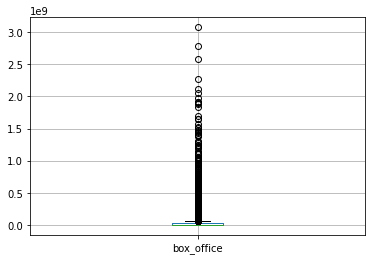

In [41]:
df[['box_office']].boxplot()

 <div class="alert alert-info"> Странные нулевые сборы удалим

In [42]:
df = df.loc[df['box_office']!=0]

df[['box_office']].describe() 

,box_office
count,2988.00
mean,76313346.23
std,238740429.16
min,40.00
25%,134470.00
50%,2484495.00
75%,24031155.08
max,3073568690.79


In [43]:
 # изучение budget
df[['budget']].describe() 


,budget
count,329.00
mean,125146704.98
std,183916186.34
min,0.00
25%,42000000.00
50%,68490606.00
75%,140025000.00
max,2305074303.00


<AxesSubplot:>

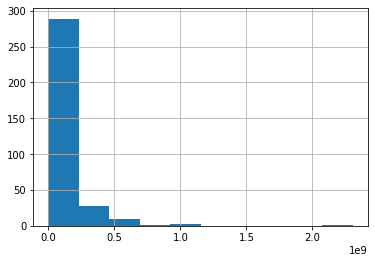

In [44]:
df['budget'].hist()

<AxesSubplot:>

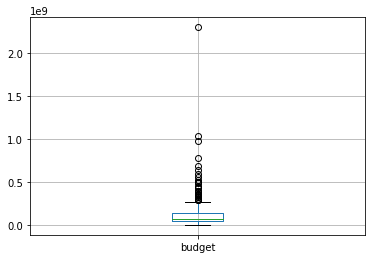

In [45]:
df[['budget']].boxplot()

<div class="alert alert-info"> Как уже отмечали, категория бюджет только у фильмов с господдержкой , отсюда и 0
в выборке по фильмам с господдержеой не беру строки с нолями ( коды ниже)

0      NaN
1      NaN
2      NaN
5      NaN
6      NaN
        ..
7481   NaN
7482   NaN
7483   NaN
7484   NaN
7485   NaN
Name: refundable_support, Length: 6738, dtype: float64

,refundable_support
count,329.00
mean,11653495.44
std,24540030.28
min,0.00
25%,0.00
50%,0.00
75%,15000000.00
max,180000000.00


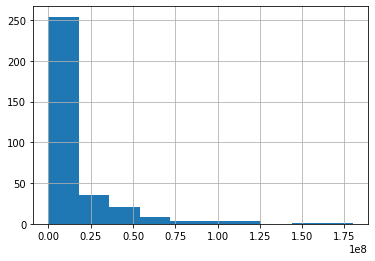

In [46]:
 # изучение refundable_support
df['refundable_support'].value_counts()
display(df['refundable_support'])
df['refundable_support'].hist()
df[['refundable_support']].describe() 

0      NaN
1      NaN
2      NaN
5      NaN
6      NaN
        ..
7481   NaN
7482   NaN
7483   NaN
7484   NaN
7485   NaN
Name: nonrefundable_support, Length: 6738, dtype: float64

,nonrefundable_support
count,329.00
mean,48059842.89
std,57011892.56
min,0.00
25%,25000000.00
50%,30000000.00
75%,40000000.00
max,400000000.00


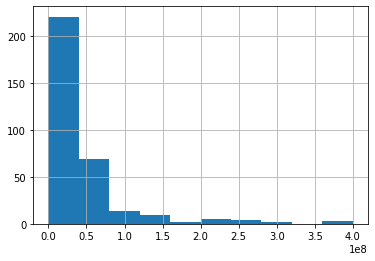

In [47]:
 # изучение refundable_support
df['nonrefundable_support'].value_counts()
display(df['nonrefundable_support'])
df['nonrefundable_support'].hist()
df[['nonrefundable_support']].describe() 

<div class="alert alert-info">  много пропусков т.к. обе колонки только для фильмов с поддержкой. Большинство значений около нуля по возвратам средств. Далее  в анализе фильмов с господдержкой  логично вести анализ по столбецу budget , который включает в себя полный объём государственной поддержки и  в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

0      7.20
1      6.60
2      6.80
5      7.70
6      8.30
       ... 
7481   0.00
7482   5.40
7483   0.00
7484   0.00
7485   6.30
Name: ratings, Length: 6738, dtype: float64

,ratings
count,6738.00
mean,5.51
std,2.50
min,0.00
25%,5.20
50%,6.30
75%,7.10
max,9.20


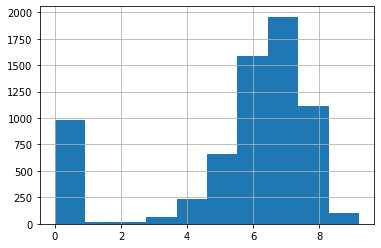

In [48]:
 # изучение ratings
df['ratings'].value_counts()
display(df['ratings'])
df['ratings'].hist()
df[['ratings']].describe()

<div class="alert alert-info"> нулевые рейтинги мешают  анализу

<div class="alert alert-info"> Средний рейтинг по фильмам в представленных данных 6.45

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,311.00,311.00,311.00,5756.00,2734.00
mean,12102893.89,48803919.12,129182771.77,6.45,79924512.59
std,25080522.01,58167183.49,188177817.93,1.11,244584850.42
min,0.00,0.00,0.00,1.00,40.00
25%,0.00,25000000.00,42556254.50,5.80,136494.50
50%,0.00,30000000.00,70305000.00,6.60,2862158.14
75%,15000000.00,43250000.00,150004286.50,7.20,29933330.11
max,180000000.00,400000000.00,2305074303.00,9.20,3073568690.79


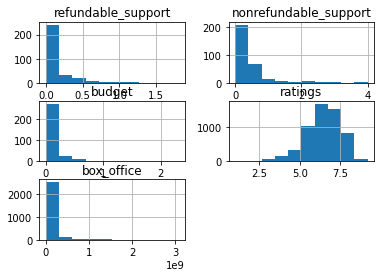

In [49]:
df.loc[df['ratings']!=0].hist()

df.loc[df['ratings']!=0].describe()

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [50]:
df['show_start_date_year']=pd.DatetimeIndex( df['show_start_date']).year
display(df.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
0,открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
5,остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016
6,любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00,2013
7,любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014
8,отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016
9,отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014
10,превосходство борна /по одноименной новелле ро...,221031416,2016-06-29T12:00:00.000Z,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"боевик,триллер,детектив",NaN,2016
11,ответный ход,111019014,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN,2014


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [51]:
#функция 
def columns_split(cell):
    main_director = cell.split(',')[0]
    
    return  main_director
    
df['main_director']=df['director'].apply(columns_split)

display(df['main_director'])

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
5            В.Абдрашитов
6               В.Меньшов
              ...        
7481          Фил Грабски
7482           Ник Пауэлл
7483     Чарльз Е.Бастьен
7484             А.Беляев
7485             И.Трусов
Name: main_director, Length: 6738, dtype: object

In [52]:
#функция 
def  columns_split_2(cell):
    main_genres =cell.split(',')[0]
    
    return main_genres 
    
df['main_genres']=df['genres'].apply(columns_split_2)

display(df['main_genres'])

0           боевик
1            драма
2       фантастика
5            драма
6        мелодрама
           ...    
7481          None
7482        боевик
7483          None
7484          None
7485       комедия
Name: main_genres, Length: 6738, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [53]:
df['federal_support']=(df['refundable_support']+df['nonrefundable_support'])/df['budget']*100
display(df. head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,federal_support
0,открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
5,остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма,NaN
6,любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов,мелодрама,NaN
7,любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл,NaN
8,отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016,Эрик Беснард,комедия,NaN
9,отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама,NaN
10,превосходство борна /по одноименной новелле ро...,221031416,2016-06-29T12:00:00.000Z,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"боевик,триллер,детектив",NaN,2016,Пол Грингросс,боевик,NaN
11,ответный ход,111019014,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN,2014,М.Туманишвили,боевик,NaN


In [54]:
df['federal_support'] = df['federal_support'].replace(float('inf'), np.nan)
df[['federal_support']].describe() 

,federal_support
count,312.00
mean,51.76
std,17.04
min,4.40
25%,37.36
50%,59.27
75%,65.72
max,78.47


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [55]:
df_show_in_year=df.pivot_table(index='show_start_date_year', values='box_office',aggfunc=['count','sum','mean','median']).reset_index()
display(df_show_in_year )

,show_start_date_year,count,sum,mean,median
,,box_office,box_office,box_office,box_office
0,2010,84,2374340.00,28265.95,2085.00
1,2011,98,13944390.00,142289.69,3042.50
2,2012,111,6465111.00,58244.24,6900.00
3,2013,171,29768531.20,174084.98,3880.00
4,2014,251,7372598571.60,29372902.68,28150.00
5,2015,428,32084649858.37,74964135.18,4398303.75
6,2016,500,43731444689.34,87462889.38,3650260.90
7,2017,356,48561554266.51,136408860.30,10177833.50
8,2018,468,47813851651.54,102166349.68,8821498.98


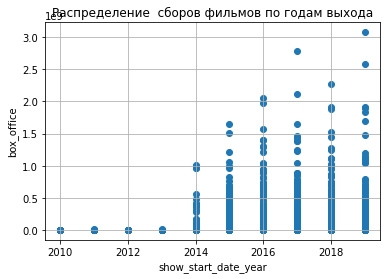

In [56]:
plt.title('Распределение  сборов фильмов по годам выхода')
plt.xlabel('show_start_date_year') 
plt.ylabel('box_office') 
plt.scatter(x=df['show_start_date_year'], y=df['box_office'])
plt.grid(True)

In [57]:
df_show_in_year_title =df.pivot_table(index='show_start_date_year', values=['title', 'box_office'], aggfunc='count')
display(df_show_in_year_title .head(10))

,box_office,title
show_start_date_year,,
2010,84,756
2011,98,474
2012,111,512
2013,171,585
2014,251,724
2015,428,658
2016,500,770
2017,356,498
2018,468,871


 <div class="alert alert-info"> добавляю столбец с долей 

In [58]:
df_show_in_year_title['part']= df_show_in_year_title['box_office']/df_show_in_year_title['title']*100
df_show_in_year_title['part']
display(df_show_in_year_title .head(10))

,box_office,title,part
show_start_date_year,,,
2010,84,756,11.11
2011,98,474,20.68
2012,111,512,21.68
2013,171,585,29.23
2014,251,724,34.67
2015,428,658,65.05
2016,500,770,64.94
2017,356,498,71.49
2018,468,871,53.73


<AxesSubplot:title={'center':'Распределение доли сборов фильмов, получивших прокатные удостоверия и вышедших в прокат по годам '}, xlabel='show_start_date_year'>

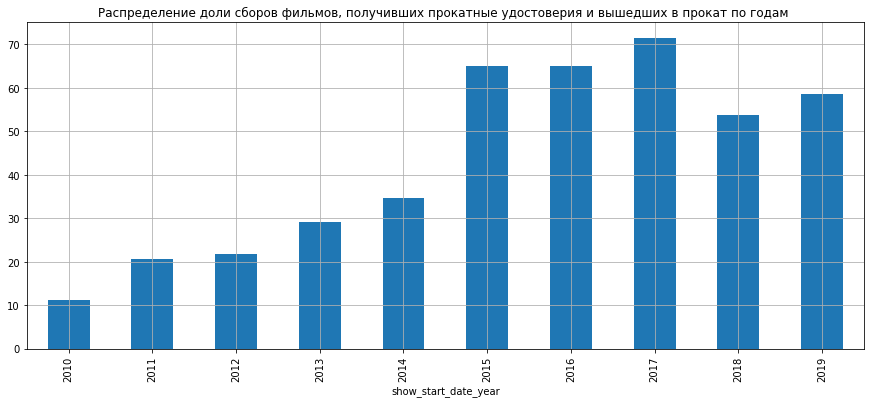

In [59]:
df_show_in_year_title['part'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение доли сборов фильмов, получивших прокатные удостоверия и вышедших в прокат по годам ', 
                                      grid=True)

 <div class="alert alert-info">вот здесь и становится очевиден неполный объем данных с 2010 по 2014 годы 

<AxesSubplot:title={'center':'Распределение по годам'}>

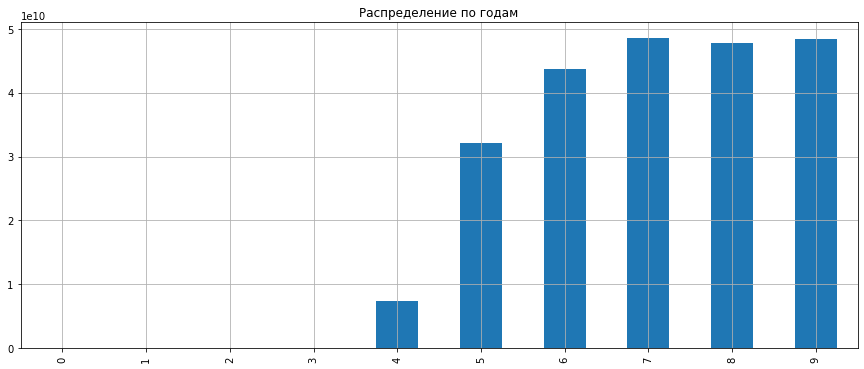

In [60]:
df_show_in_year[  'sum','box_office'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение по годам', 
                                      grid=True)

In [61]:
df_show_in_year.describe()

,show_start_date_year,count,sum,mean,median
,,box_office,box_office,box_office,box_office
count,10.00,10.00,10.00,10.00,10.00
mean,2014.50,298.80,22802427852.07,52369093.40,3187543.61
std,3.03,176.00,23056453698.77,52052463.58,3878069.98
min,2010.00,84.00,2374340.00,28265.95,2085.00
25%,2012.25,126.00,17900425.30,150238.51,4635.00
50%,2014.50,303.50,19728624214.98,52168518.93,1839205.45
75%,2016.75,458.00,46793249910.99,91550406.29,4687187.06
max,2019.00,521.00,48561554266.51,136408860.30,10177833.50


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

 <div class="alert alert-info"> 
    Минимальные значения суммы сборов от проката были в 2010году, максимальная в 2019(  по сумме)

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

 <div class="alert alert-info">  собственно таблица в коде выше просто  еще медиану взять))

<AxesSubplot:title={'center':'Распределение медианы сборов по годам '}>

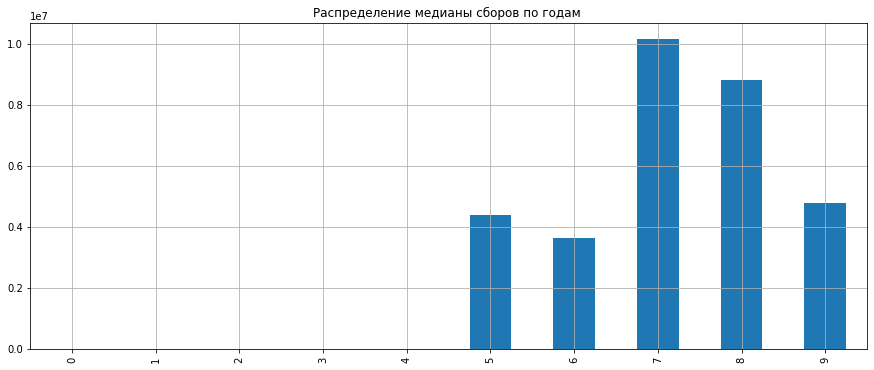

In [62]:
df_show_in_year['median', 'box_office'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение медианы сборов по годам ', 
                                      grid=True)

<AxesSubplot:title={'center':'Распределение средних сборов по годам '}>

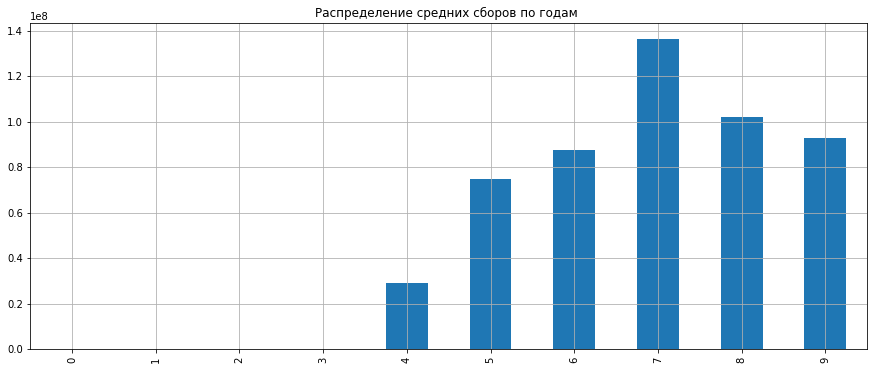

In [64]:
df_show_in_year['mean', 'box_office'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение средних сборов по годам ', 
                                      grid=True)

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [65]:
#объявляем переменную и выбираем строки с2015 по 2019г
restriction_year=2015
df_restriction_year=df.query('show_start_date_year> = @restriction_year')
display(df_restriction_year)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,federal_support
0,открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
5,остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма,NaN
8,отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016,Эрик Беснард,комедия,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,сад художника: американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,None,NaN,2019,Фил Грабски,None,NaN
7482,звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик,NaN
7483,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,None,NaN,2019,Чарльз Е.Бастьен,None,NaN
7484,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,None,NaN,2019,А.Беляев,None,NaN


In [66]:
# объединенная таблица сборов фильмов с ограничением возраста с 2015 по 2019г( какая была у меня))
df_age_restriction_mine=df_restriction_year.pivot_table(index= ['show_start_date_year','age_restriction'], values='box_office', aggfunc=['count','sum','mean'])
display(df_age_restriction_mine )

count  \
                                                            box_office   
show_start_date_year age_restriction                                     
2015                 «0+» - для любой зрительской аудитории         35   
                     «12+» - для детей старше 12 лет                71   
                     «16+» - для детей старше 16 лет               157   
                     «18+» - запрещено для детей                   116   
                     «6+» - для детей старше 6 лет                  49   
2016                 «0+» - для любой зрительской аудитории         40   
                     «12+» - для детей старше 12 лет                80   
                     «16+» - для детей старше 16 лет               166   
                     «18+» - запрещено для детей                   146   
                     «6+» - для детей старше 6 лет                  68   
2017                 «0+» - для любой зрительской аудитории          3   
                     «12+» - для детей старше 12 лет                41   
                     «16+» - для детей старше 16 лет               120   
                     «18+» - запрещено для детей                   147   
                     «6+» - для детей старше 6 лет                  45   
2018                 «0+» - для любой зрительской аудитории          5   
                     «12+» - для детей старше 12 лет                67   
                     «16+» - для детей старше 16 лет               154   
                     «18+» - запрещено для детей                   174   
                     «6+» - для детей старше 6 лет                  68   
2019                 «0+» - для любой зрительской аудитории          3   
                     «12+» - для детей старше 12 лет                83   
                     «16+» - для детей старше 16 лет               175   
                     «18+» - запрещено для детей                   179   
                     «6+» - для детей старше 6 лет                  81   

                                                                       sum  \
                                                                box_office   
show_start_date_year age_restriction                                         
2015                 «0+» - для любой зрительской аудитории   273367767.78   
                     «12+» - для детей старше 12 лет        11957220583.41   
                     «16+» - для детей старше 16 лет         8274253188.89   
                     «18+» - запрещено для детей             3184097942.98   
                     «6+» - для детей старше 6 лет           8395710375.31   
2016                 «0+» - для любой зрительской аудитории   150183548.67   
                     «12+» - для детей старше 12 лет        12178337053.01   
                     «16+» - для детей старше 16 лет        14359349614.80   
                     «18+» - запрещено для детей             4990430064.62   
                     «6+» - для детей старше 6 лет          12053144408.24   
2017                 «0+» - для любой зрительской аудитории   229598930.00   
                     «12+» - для детей старше 12 лет         7851427660.67   
                     «16+» - для детей старше 16 лет        18742889949.06   
                     «18+» - запрещено для детей             9651495581.02   
                     «6+» - для детей старше 6 лет          12086142145.76   
2018                 «0+» - для любой зрительской аудитории    32449002.11   
                     «12+» - для детей старше 12 лет        14267291660.69   
                     «16+» - для детей старше 16 лет        14817363006.43   
                     «18+» - запрещено для детей             8591773358.90   
                     «6+» - для детей старше 6 лет          10104974623.41   
2019                 «0+» - для любой зрительской аудитории    17746066.82   
                     «12+» - для детей старше 12 лет        12676553693.67   
                     «16+» - для детей ста

<AxesSubplot:title={'center':'Распределение  кассовых сборов'}, xlabel='show_start_date_year,age_restriction'>

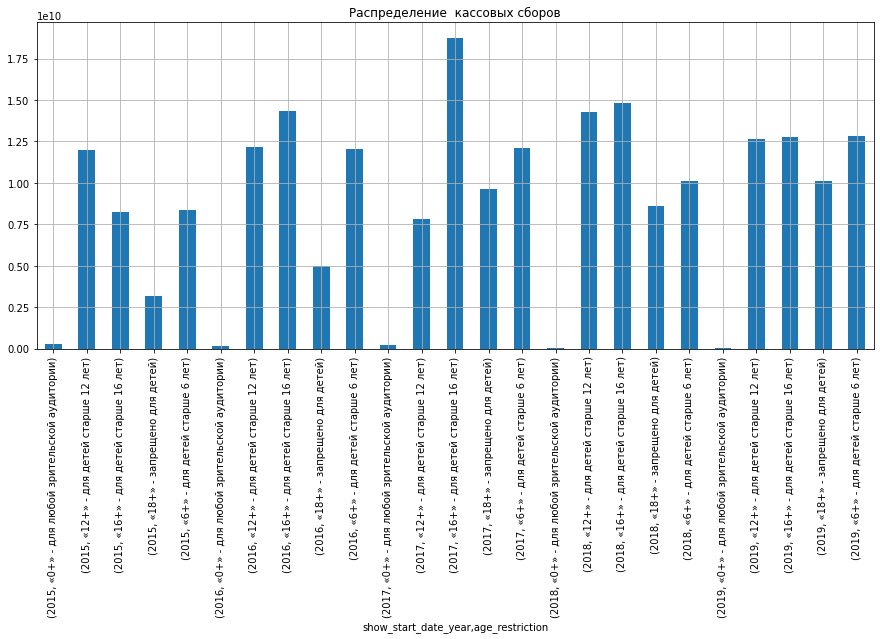

In [67]:
df_age_restriction_mine['sum','box_office'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение  кассовых сборов', 
                                      grid=True)

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_date_year,,,,,
2015,273367767.78,11957220583.41,8274253188.89,3184097942.98,8395710375.31
2016,150183548.67,12178337053.01,14359349614.80,4990430064.62,12053144408.24
2017,229598930.00,7851427660.67,18742889949.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,14817363006.43,8591773358.90,10104974623.41
2019,17746066.82,12676553693.67,12746769432.60,10114009267.16,12852548650.86


<AxesSubplot:title={'center':'Распределение  кассовых сборов'}, xlabel='show_start_date_year'>

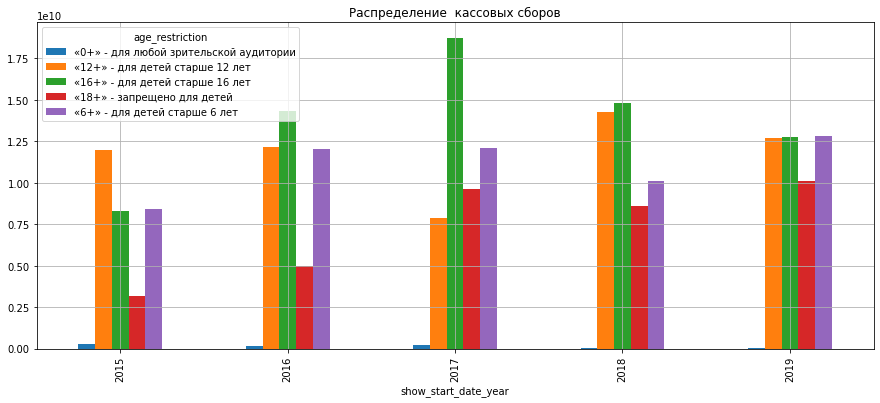

In [68]:
# объединенная таблица сборов фильмов с ограничением возраста с 2015 по 2019гг
df_age_restriction =df_restriction_year.pivot_table(index='show_start_date_year', columns = 'age_restriction', values='box_office', aggfunc='sum')
display(df_age_restriction)
df_age_restriction.plot(kind='bar', 
                        figsize=(15, 6), 
                         title='Распределение  кассовых сборов', 
                         grid=True)

 <div class="alert alert-info"> Самые низкие сборы у фильмов категории 0+ по всей выборке. Также невысоки и сборы в категориях 18+( фильмы для взрослых ) во всем анализе. В 2015 году самые высокие сборы у категории 12+ В годах позже лидируют по сборам фильмы 16+.Это категория фильмов традиционно с вечерними показами. Картина сборов в категориях с возрастными ограничениями стала меняться в 2019г, когда сборы в основных категориях стали выравниваться 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

 <div class="alert alert-info">  Из приложенной документации следует, что столбец  'budget'  уже включает в себя полный объем господдержки
    Для анализа заполним пропуски на 0 и выберем строки с поддержкой (>0)

In [69]:
#Заполнение пропусков в колонке budget на 0
df['budget']=df['budget'].fillna(value=0)
display(df['budget'].value_counts())

0.00            6426
38000000.00        6
80000000.00        4
50000000.00        4
37142857.00        3
                ... 
49280496.00        1
56693559.00        1
57166797.00        1
109814241.00       1
42252509.00        1
Name: budget, Length: 287, dtype: int64

In [70]:

df_get_budget=df.query('budget >0')
                      
display(df_get_budget. head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,federal_support
1281,пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,33.37
1448,бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,0.00,None,28140.00,2014,А.Якимчук,None,70.00
1498,невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,61.27
1524,берцы,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,братья ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,62.48
1854,тайна сухаревой башни. чародей равновесия,114000115,2015-02-18T12:00:00.000Z,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,2015,С.Серегин,мультфильм,48.22
1870,а зори здесь тихие..._,111002915,2015-03-16T12:00:00.000Z,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,2015,Р.Давлетьяров,драма,68.00
1871,две женщины,111013714,2014-10-02T12:00:00.000Z,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,46502299.00,86210067.00,"Министерство культуры, Фонд кино",6.70,драма,4731239.50,2014,В.Глаголева,драма,53.94
1903,призрак_.,111001815,2015-03-02T12:00:00.000Z,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,А.Войтинский,триллер,53.74
1912,ведьма .,111002215,2015-03-05T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,2015,Д.Федоров,фэнтези,70.00


In [71]:
# budget среднее 
df_get_budget['budget'].mean()

131965595.95833333

In [72]:
#  budget медиана
df_get_budget['budget'].median()

72448592.5

In [73]:
df_get_budget[['budget']].describe()

,budget
count,312.00
mean,131965595.96
std,186470842.42
min,14462464.00
25%,46000048.25
50%,72448592.50
75%,150002143.25
max,2305074303.00


 <div class="alert alert-info">В среднем  на поддержку киноиндустрии выделяется 134096082.35( по среднему показателю ), по медиане цифра в два раза меньше,
причем господдержку получили  всего чуть более 4 % фильмов от общей выборки

 <div class="alert alert-info"> В кодах ниже представлен анализ доли господдержки от общего бюджета  фильма ( Колонка создана  в задании для общей выборки , но анализ там неинформативен ввиду малого кол-ва) )

In [74]:
#анализ  по колонке соотношения общего  бюджета фильма и господдержки  
display(df_get_budget[['federal_support']].describe())

,federal_support
count,312.00
mean,51.76
std,17.04
min,4.40
25%,37.36
50%,59.27
75%,65.72
max,78.47


In [75]:
#объединенная таблица  соотношения общего  бюджета фильма и господдержки 
df_get_federal_support=df_get_budget.pivot_table(index=['box_office','show_start_date_year','budget'], values='federal_support',aggfunc=['max','min','mean']).reset_index()
display(df_get_federal_support)

,box_office,show_start_date_year,budget,max,min,mean
,,,,federal_support,federal_support,federal_support
0,1550.00,2015,91000000.00,38.46,38.46,38.46
1,4450.00,2015,37943652.00,69.84,69.84,69.84
2,6000.00,2015,59560746.00,43.49,43.49,43.49
3,9000.00,2016,90822766.00,55.05,55.05,55.05
4,19820.00,2015,37371262.00,66.90,66.90,66.90
...,...,...,...,...,...,...
294,1445731797.89,2018,148585222.00,57.21,57.21,57.21
295,1655037688.00,2017,352477575.00,28.37,28.37,28.37
296,2271754004.52,2018,563784717.00,31.93,31.93,31.93


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


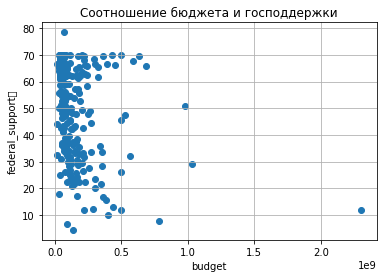

In [76]:
plt.title('Соотношение бюджета и господдержки')
plt.xlabel('budget')
plt.ylabel('federal_support	')
plt.scatter(x=df_get_federal_support['budget'], y=df_get_federal_support['mean','federal_support'])
plt.grid(True)

 <div class="alert alert-info"> 
    государственное финансирование может составлять  до 70% бюджетов  картин 

In [77]:
#источники госфинансирования
df_get_budget['financing_source'].value_counts()

Министерство культуры               162
Фонд кино                           129
Министерство культуры, Фонд кино     21
Name: financing_source, dtype: int64

 <div class="alert alert-info"> т.к. "важнейшим из искусств для нас является кино", то основной источник финансирования Министерство культуры) Странный объединенный источник в 21 картине может быть каким либо совместным фондом , или ошибкой 

In [78]:
# выбор строк  без нулевых рейтингов в анализ фильмов  с господдержкой
df_ratings =df_get_budget.query('ratings >0')
                      
display(df_ratings. head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,federal_support
1281,пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,33.37
1498,невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,61.27
1524,берцы,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,братья ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,62.48
1854,тайна сухаревой башни. чародей равновесия,114000115,2015-02-18T12:00:00.000Z,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,2015,С.Серегин,мультфильм,48.22
1870,а зори здесь тихие..._,111002915,2015-03-16T12:00:00.000Z,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,2015,Р.Давлетьяров,драма,68.00
1871,две женщины,111013714,2014-10-02T12:00:00.000Z,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,46502299.00,86210067.00,"Министерство культуры, Фонд кино",6.70,драма,4731239.50,2014,В.Глаголева,драма,53.94
1903,призрак_.,111001815,2015-03-02T12:00:00.000Z,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,А.Войтинский,триллер,53.74
1912,ведьма .,111002215,2015-03-05T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,2015,Д.Федоров,фэнтези,70.00
1987,елки лохматые,111023114,2014-12-10T12:00:00.000Z,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.00,30000000.00,80000000.00,Фонд кино,5.00,"семейный,комедия",121225633.80,2014,Максим Свешников,семейный,70.00


In [79]:
#объединенная таблица средних рейтингов фильмов с поддержкой 
df_get_support_ratings=df_ratings.pivot_table(index=['box_office','show_start_date_year','genres','budget'], values='ratings',aggfunc='mean').reset_index()
display(df_get_support_ratings)

,box_office,show_start_date_year,genres,budget,ratings
0,1550.00,2015,"мелодрама,комедия",91000000.00,7.40
1,4450.00,2015,мелодрама,37943652.00,6.60
2,6000.00,2015,"фэнтези,приключения",59560746.00,5.40
3,9000.00,2016,"драма,фантастика",90822766.00,4.80
4,35897.00,2016,"драма,мелодрама",46200000.00,7.20
...,...,...,...,...,...
278,1402255390.00,2016,"драма,триллер,приключения",635283867.00,7.60
279,1655037688.00,2017,"комедия,фэнтези,приключения",352477575.00,6.80
280,2271754004.52,2018,"драма,военный,боевик",563784717.00,6.50
281,2779686144.00,2017,"спорт,драма",590192191.00,7.50


In [80]:
display(df_get_support_ratings['ratings'].value_counts())
df_get_support_ratings[['ratings']].describe()

6.20    21
5.80    15
6.60    14
6.70    14
6.30    13
6.10    12
6.50    10
6.90    10
6.80    10
6.40     9
6.00     8
5.40     8
5.70     7
7.30     7
5.30     7
5.10     7
5.90     6
7.40     6
4.80     6
7.00     6
5.00     6
5.60     6
4.90     6
7.50     6
4.70     5
3.20     4
5.20     4
5.50     4
7.10     4
7.70     4
7.60     3
7.20     3
4.50     3
4.30     3
8.50     2
7.80     2
3.90     2
4.00     2
7.90     2
2.90     2
4.20     2
3.30     1
8.20     1
2.80     1
4.60     1
3.00     1
3.10     1
8.00     1
8.10     1
3.80     1
1.00     1
2.50     1
3.50     1
Name: ratings, dtype: int64

,ratings
count,283.00
mean,6.01
std,1.14
min,1.00
25%,5.40
50%,6.20
75%,6.70
max,8.50


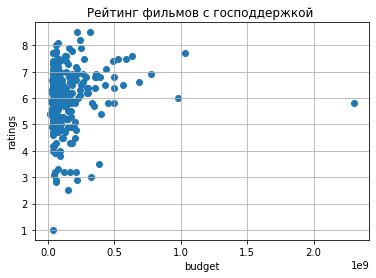

In [81]:
plt.title('Рейтинг фильмов с господдержкой ')
plt.xlabel('budget')
plt.ylabel('ratings')
plt.scatter(x=df_get_support_ratings['budget'], y=df_get_support_ratings['ratings'])
plt.grid(True)

 <div class="alert alert-info"> Средний рейтинг фильмов с господдержкой 6.01 ( что несколько ниже среднего рейтинга по общей выборке) , самый высокий  рейтинг в этой категории фильмов 8.5 (при максимуме по общей выборке 9.2)у 2 представленных к господдержке картин.
    
    Прямой зависимости рейтинга фильма от величины бюджета не выявлено

In [82]:
#объединенная таблица средних сборов фильмов с поддержкой 
df_get_support_box_office=df_get_budget.pivot_table(index=['ratings','show_start_date_year','genres','budget'], values='box_office',aggfunc='mean').reset_index()
display(df_get_support_box_office)

,ratings,show_start_date_year,genres,budget,box_office
0,0.00,2014,None,37142857.00,28140.00
1,0.00,2015,None,37371262.00,19820.00
2,0.00,2015,None,49071428.00,182510.00
3,0.00,2015,None,74071918.00,11011814.30
4,0.00,2015,драма,14462464.00,801370.00
...,...,...,...,...,...
294,8.00,2017,драма,63170000.00,410058.00
295,8.10,2013,"драма,мелодрама",79411900.00,365353.60
296,8.20,2019,драма,240041307.00,408646665.70
297,8.50,2015,"драма,военный,история",220588394.00,249166767.70


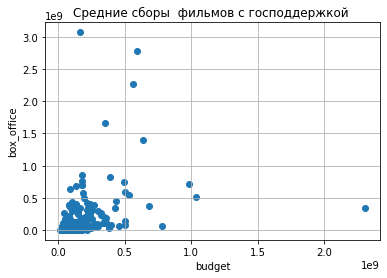

In [83]:
plt.title('Средние сборы  фильмов с господдержкой ')
plt.xlabel('budget')
plt.ylabel('box_office')
plt.scatter(x=df_get_support_ratings['budget'], y=df_get_support_ratings['box_office'])
plt.grid(True)

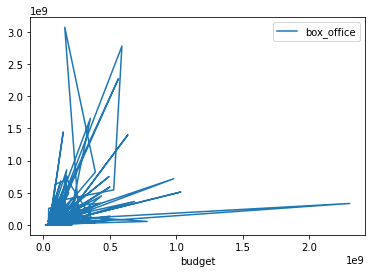

In [84]:
df_get_support_box_office.plot(x="budget", y="box_office")
    
plt.show()


## Общий вывод
 
Проведен анализ  рынка российского кинопроката  по данным, опубликованным на портале открытых данных Министерства культуры за период с 2010 по 2019гг.

В представленных  данных содержится информация о прокатных удостоверениях, датах выхода фильмов в прокат,информация о производстве фильма( студия страна , режиссер, продюссер), возрастной категории, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Отдельный анализ проведен по фильмам, которые получили государственную поддержку.

### Выводы:

1. Данные о прокате в кинотеатрах указаны не для всех фильмов.
Данные 2010-2014гг. можно считать неинформативными  т.к. данные известны  у 30% и менее ( так 2010г- менее 12%)   
Наиболее полно представлены данные о прокате для фильмов с 2015 по 2019 гг.(более 65%) По этим данным можно сделать вывод,что выходит около 400 фильмов в год .Причем намечается рост числа выхода фильмов и полноты объема данных ,что можно связать с возрастающей цифровизацией отрасли

2. Минимальные значения суммы сборов от проката были в 2010году(2363095.00).Максимальное значение  в 2019г.-
  48274315577.51 по сумме) Что вновь указывает на  неполную картину данных 2010-2015гг.
  
3. Причиной отличия средних и медианных сборов по годам является недостаточной кол-во данных и пропуски.

4. Анализ сборов фильмов с возрастнымы ограничениями  аудитории, представленными прокате в период с 2015 по 2019гг.
Самые низкие сборы у фильмов категории 0+ по всей выборке. Также невысоки и сборы в категориях 18+( фильмы для взрослых ) во всем анализе. 
В 2015 году самые высокие сборы у категории 12+.В годах позже лидируют по сборам фильмы 16+.Это категория фильмов традиционно с вечерними показами. Картина сборов в категориях с возрастными ограничениями стала меняться в 2019г, когда сборы в основных категориях стали выравниваться ,что может быть связано с принятием  более четких критериев  оценки категорий,  в сравнении с теми что были ранее (установлены в 2012г)
 
 
### Анализ категории фильмов с государственной поддержкой:


1. В среднем на поддержку киноиндустрии выделяется 134096082.35( по среднему показателю ) 

2. Господдержку получили всего чуть более 4 % фильмов от общей выборки

3. Государственное финансирование может составлять 70% бюджетов картин и даже более

4. Основной источник финансирования Министерство культуры.

5. Государственное финансирование может составлять до 70% бюджетов картин

6. Средний рейтинг фильмов с господдержкой  6.01 ( что несколько ниже среднего рейтинга по общей выборке).
   Самый высокий рейтинг в этой категории фильмов 8.5 (при максимуме по общей выборке 9.2)у 2 представленных    к господдержке картин.

7. Прямой зависимости рейтинга фильма от величины бюджета не выявлено


Проведенное исследование позволит выявить текущее положение рынка киноиндустрии  и более  грамотно распределять государственные бюджетные средства поддержки  в более рейтинговые  проекты














